# 4.7 Task Deriving New Variables

## Contents
### Importing Libraries
### Importing Data
### Path to Storage
### Deriving Variables
### If-Statements
### If-Statements with User-Defined Functions
### If-Statements with the loc() Function
### If-Statements with For-Loops
## Task 4.7
### Step 1
### Step 2
### Step 3
### Step 4
### Step 5
### Step 6
### Step 7
### Step 8

### Importing Libraries

In [32]:
# Import libraries
import pandas as pd
import numpy as np
import dask.dataframe as dd
import os
import matplotlib.pyplot as plt

### Path to Storage

In [6]:
# Path to storage location
path = r'C:\Users\ihs10539\Achievement 4 Project'

### Importing Data

In [8]:
# importing df_ords_pros_merge
df_ords_prods_merge = pd.read_pickle(r'C:\Users\ihs10539\Achievement 4 Project\02_Data\02.02_Prepared Data\4.6_df_ords_prods_merge.pkl')

## Deriving Variables

## If-Statements

## If-Statements with User-Defined Functions

In [13]:
# Subsetting dataframe to first one million rows
df = df_ords_prods_merge[:1000000]

In [15]:
# if else statement going through prices to mark them as low, mid, and high range
def price_label(row):

  if row['prices'] <= 5:
    return 'Low-range product'
  elif (row['prices'] > 5) and (row['prices'] <= 15):
    return 'Mid-range product'
  elif row['prices'] > 15:
    return 'High range'
  else: return 'Not enough data'

In [17]:
# creates new column for the returned labels to be placed
df['price_range'] = df.apply(price_label, axis=1)

C:\Users\ihs10539\AppData\Local\Temp\ipykernel_18652\3163300368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_range'] = df.apply(price_label, axis=1)


In [19]:
# Verification of value
df['price_range'].value_counts(dropna = False)

price_range
Mid-range product    673183
Low-range product    314392
High range            12425
Name: count, dtype: int64

In [21]:
df['prices'].max()

99999.0

## If-Statements with the loc() Function

In [24]:
# same as the for-loop above but using the .loc statement
df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'

C:\Users\ihs10539\AppData\Local\Temp\ipykernel_18652\1756127282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'


In [26]:
df.loc[(df['prices'] <= 15) & (df['prices'] > 5), 'price_range_loc'] = 'Mid-range product'

In [28]:
df.loc[df['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

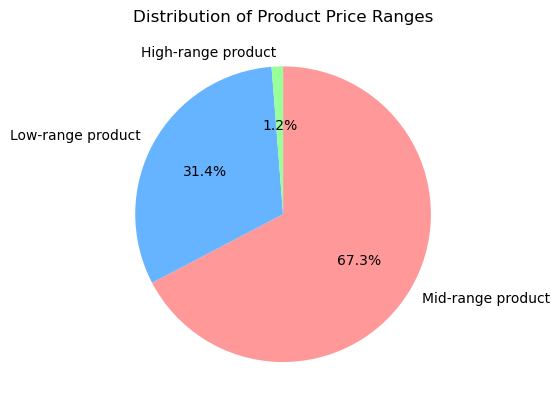

In [34]:
# Create a pie chart instead of a bar chart
df['price_range_loc'].value_counts(dropna=False).plot.pie(
    autopct='%1.1f%%', 
    colors=['#ff9999','#66b3ff','#99ff99'], 
    startangle=90, 
    counterclock=False
)

# Set the title and show the plot
plt.title('Distribution of Product Price Ranges')
plt.ylabel('')  # Hide the y-label
plt.show()


In [ ]:
bar_df_price_range = df_ords_prods_custs_merge['loyalty_flag'].value_counts().plot.bar()

## If-Statements with For-Loops

In [32]:
# for-loop to label days of the week to show which ones are busiest, least busy, and regular
result = []

for value in df_ords_prods_merge["orders_day_of_week"]:
  if value == 0:
    result.append("Busiest day")
  elif value == 4:
    result.append("Least busy")
  else:
    result.append("Regularly busy")

In [34]:
result

['Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy',
 'Least busy

In [36]:
# Consolidating results to dataframe
df_ords_prods_merge['busiest_day'] = result

In [38]:
# Verifying data
df_ords_prods_merge['busiest_day'].value_counts(dropna = False)

busiest_day
Regularly busy    22416875
Busiest day        6204182
Least busy         3783802
Name: count, dtype: int64

# Task 4.7

## Step 1

## Step 2

In [43]:
# Count to figure out which days have the most orders
df_ords_prods_merge['orders_day_of_week'].value_counts(dropna = False)

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [45]:
# for-loop to label the orders of days (0,1 = Busiest, 3,4 = Slowest, Others = Regular
result_step_2 = []
for value in df_ords_prods_merge["orders_day_of_week"]:
  if value == 0 or value == 1:  result_step_2.append("Busiest days")
  elif value == 4 or value == 3: result_step_2.append("Slowest days")
  else: result_step_2.append("Regularly busy")

In [47]:
result_step_2

['Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Busiest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Slowest days',
 'Slowest day

In [49]:
# Generate new colum for "busiest_days"
df_ords_prods_merge['busiest_days'] = result_step_2

## Step 3

In [52]:
df_ords_prods_merge['busiest_days'].value_counts(dropna = False)

busiest_days
Regularly busy    12916111
Busiest days      11864412
Slowest days       7624336
Name: count, dtype: int64

In [54]:
# verifying "busiest days" column
df_ords_prods_merge.head ()

,Unnamed: 0_x,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,_merge,Unnamed: 0.1,Unnamed: 0_y,product_name,aisle_id,department_id,prices,match,busiest_day,busiest_days
0,0,2539329,1,prior,1,2,8,NaN,196,1,...,both,192,195,Soda,77,7,9.0,both,Regularly busy,Regularly busy
1,0,2539329,1,prior,1,2,8,NaN,14084,2,...,both,14069,14084,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Regularly busy
2,0,2539329,1,prior,1,2,8,NaN,12427,3,...,both,12412,12427,Original Beef Jerky,23,19,4.4,both,Regularly busy,Regularly busy
3,0,2539329,1,prior,1,2,8,NaN,26088,4,...,both,26073,26089,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Regularly busy
4,0,2539329,1,prior,1,2,8,NaN,26405,5,...,both,26390,26406,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Regularly busy


As expected the values are running much closer together now than they did with busiest_day since we are using a smaller number of groupings. It does however make it nice to better break up the week into sections rather than just having two defined standouts and the rest be in a kind of gray area. 

## Step 4

In [58]:
# sorted list of hours by count
df_ords_prods_merge['order_hour_of_day'].value_counts()

order_hour_of_day
10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: count, dtype: int64

In [60]:
# Generate empty list with for-loop to create labels for most, fewest, and average orders
result_step_4 = []
for value in df_ords_prods_merge["order_hour_of_day"]:
  if value in [10, 11, 14, 15, 13, 12, 16, 9]: result_step_4.append("Most orders")
  elif value in [23, 6, 0, 1, 5, 2, 4, 3]: result_step_4.append("Fewest orders")
  else: result_step_4.append("Average orders")

In [61]:
result_step_4

['Average orders',
 'Average orders',
 'Average orders',
 'Average orders',
 'Average orders',
 'Average orders',
 'Average orders',
 'Average orders',
 'Average orders',
 'Average orders',
 'Average orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Average orders',
 'Average orders',
 'Average orders',
 'Average orders',
 'Average orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Average orders',
 'Average orders',
 'Average orders',
 'Average orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Average orders',
 'Average orders',
 'Average orders',
 'Average orders',
 'Average orders',
 'Average orders',
 'Average orders',
 'Avera

In [64]:
# generate new column
df_ords_prods_merge['busiest_period_of_day'] = result_step_4

## Step 5

In [67]:
# checking counts
df_ords_prods_merge['busiest_period_of_day'].value_counts(dropna = False)

busiest_period_of_day
Most orders       21118071
Average orders     9997651
Fewest orders      1289137
Name: count, dtype: int64

In [69]:
# Double checking data to make sure nothing appears crazy before export
df_ords_prods_merge.head()

,Unnamed: 0_x,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,Unnamed: 0.1,Unnamed: 0_y,product_name,aisle_id,department_id,prices,match,busiest_day,busiest_days,busiest_period_of_day
0,0,2539329,1,prior,1,2,8,NaN,196,1,...,192,195,Soda,77,7,9.0,both,Regularly busy,Regularly busy,Average orders
1,0,2539329,1,prior,1,2,8,NaN,14084,2,...,14069,14084,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Regularly busy,Regularly busy,Average orders
2,0,2539329,1,prior,1,2,8,NaN,12427,3,...,12412,12427,Original Beef Jerky,23,19,4.4,both,Regularly busy,Regularly busy,Average orders
3,0,2539329,1,prior,1,2,8,NaN,26088,4,...,26073,26089,Aged White Cheddar Popcorn,23,19,4.7,both,Regularly busy,Regularly busy,Average orders
4,0,2539329,1,prior,1,2,8,NaN,26405,5,...,26390,26406,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Regularly busy,Regularly busy,Average orders


## Step 6

## Step 7

In [73]:
# export data

df_ords_prods_merge.to_pickle(os.path.join(path, '02_Data', '02.02_Prepared Data', '4.7_Tas_df_ords_prods_merged_derived.pkl'))

## Step 8